In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [2]:
time = np.linspace(0,2*3.1416,1000)

In [3]:
sin = np.sin(time)
cos = np.cos(time)

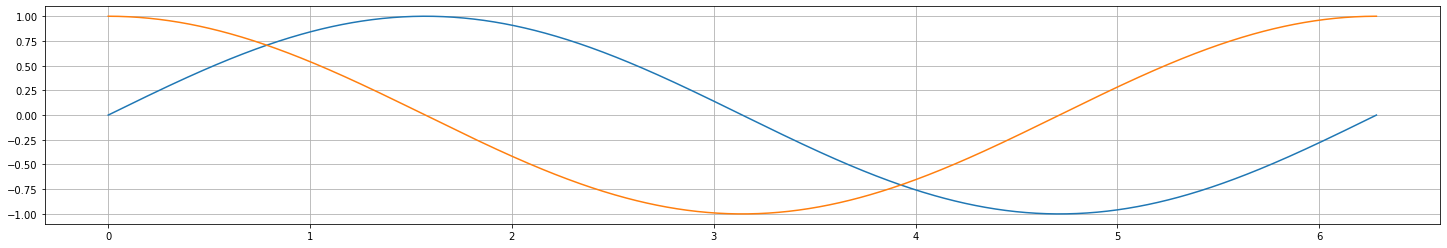

In [4]:
fig = plt.figure(figsize=(25,4))

plt.plot(time,sin,label='sin')
plt.plot(time,cos,label='cos')
plt.grid(True)
plt.show()

Lets try to predict the next step using the sin(time) and cos(time) as the states.

In [5]:
states = np.concatenate((sin[:,np.newaxis],cos[:,np.newaxis]),axis=1)

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim

In [7]:
class Net(nn.Module):
    def __init__(self):
        self.INPUT_FEATURES = 2
        self.OUTPUT_FEATURES = 2
        super().__init__()
        self.fc_1 = nn.Sequential(nn.Linear(self.INPUT_FEATURES, self.OUTPUT_FEATURES))

    def forward(self, x):
        x = self.fc_1(x)
        return x

In [8]:
net = Net()
loss_function = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=0.01)

In [9]:
X = states[:-1,:]
y = states[1:,:]

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5,shuffle=False)

In [11]:
X_train = torch.Tensor(X_train)
y_train = torch.Tensor(y_train)

X_test = torch.Tensor(X_test)
y_test = torch.Tensor(y_test)

In [37]:
EPOCH = 1000

net.train()
for epoch in range(EPOCH):
    net.zero_grad()
    
    output = net(X_train)
    loss = loss_function(output,y_train)
    loss.backward()
    optimizer.step()
    

In [38]:
net.eval()
with torch.no_grad():
    output = net(X_test)

In [39]:
output = np.array(output)

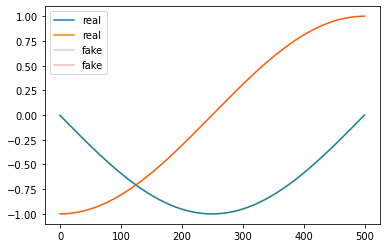

In [40]:
plt.plot(range(y_test.shape[0]),y_test,label='real')
plt.plot(range(output.shape[0]),output,label='fake',alpha=0.3)
plt.legend()

In [41]:
X_init = X[0]

In [42]:
output = X_init
outputs = [output]

STEPS = 10000

net.eval()
with torch.no_grad():
    for _ in range(STEPS):
        output = torch.Tensor(output)
        output = net(output)
        outputs.append(np.array(output))
        
outputs = np.array(outputs)

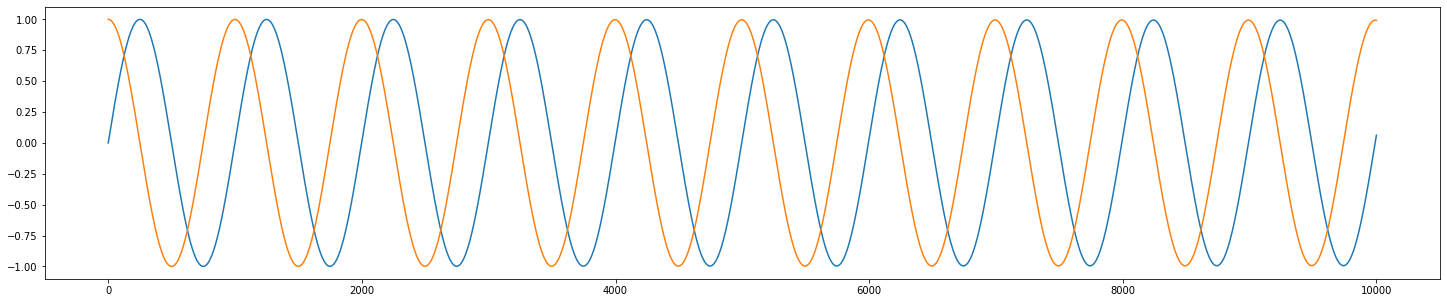

In [43]:
fig = plt.figure(figsize=(25,5))
plt.plot(range(outputs.shape[0]),outputs)